# Building models - part 2

1. [Decision trees - recap](#section1)
2. [Feature importance](#section2)  
3. [SVM model](#section3)
4. [Overfitting](#section4)\
    4.1 [Prune max depth](#section4.1)\
    4.2 [Decision forests](#section4.2)


<div>
<img src="https://github.com/nlihin/data-analytics/raw/main/images/03-Machine-Learning-Learning-Curve.jfif" width="500"/>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

<a id='section2'></a>
# 1. Decision trees - recap

The whole model

Load the data

In [3]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/iris.csv'
iris_df = pd.read_csv(url)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Prepare the data - split the data to training data and test data:

In [3]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_df[features]
y = iris_df['class']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

Define, fit, predict, evaluate

In [4]:
#define
dt_model = DecisionTreeClassifier(random_state=0)
#fit:
dt_model.fit(X_train, y_train)
#predict:
pred = dt_model.predict(X_test)
#evaluate:
acc = sk.metrics.accuracy_score(pred, y_test)
acc

0.9555555555555556

A truth table

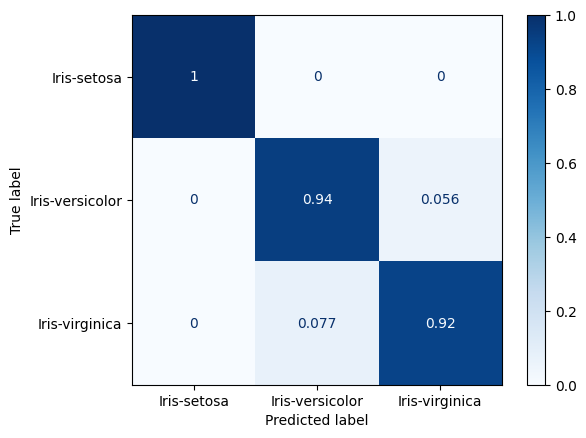

In [5]:
cm = confusion_matrix(y_test, pred, labels=dt_model.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap=plt.cm.Blues)

<a id='section2'></a>
# 2. Feature importance

Petal vs Sepal

Which attributes were the most important in the training data?

In [6]:
dt_model.feature_importances_

array([0.02146947, 0.02146947, 0.06316954, 0.89389153])

organize it in a nicer format:

In [7]:
feature_importances = pd.DataFrame(dt_model.feature_importances_,
                                   index = iris_df.columns[:4],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
petal_width,0.893892
petal_length,0.063170
sepal_length,0.021469
sepal_width,0.021469


> ### <span style="color:blue"> Exercise:</span>
>
> We see that petal is more important. 
> What happens if we train a tree using only sepal? try it

In [5]:
small_df = iris_df[['sepal_length','sepal_width','class']].copy()
# continue here



In [25]:
features = ['sepal_length', 'sepal_width']
X = small_df[features]
y = small_df['class']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

In [26]:
#define
dt_model1 = DecisionTreeClassifier(random_state=0)
#fit:
dt_model1.fit(X_train, y_train)
#predict:
pred1 = dt_model1.predict(X_test)
#evaluate:
acc = sk.metrics.accuracy_score(pred1, y_test)
acc

0.6222222222222222



> ### <span style="color:blue"> Exercise:</span>
>
> What if we use one petal and one sepal?

-----

<a id='section3'></a>
# 3. SVM model 

In [9]:
#from sklearn.svm import SVC
svm_model = SVC(random_state = 0)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
sk.metrics.accuracy_score(svm_pred, y_test)

0.9777777777777777

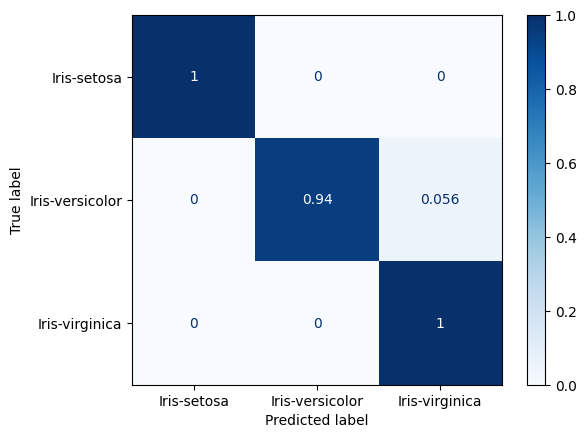

In [10]:
cm = confusion_matrix(y_test, svm_pred, labels=svm_model.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)

> ### <span style="color:blue"> Exercise:</span>
>
> Exercise: What is the difference between the SVM and the Decision tree classifiers?

<a id='section4'></a>

# 4. Overfitting 

## 4.1 Prune max depth

Load the [digits](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html) dataset. 

In [13]:
from sklearn.datasets import load_digits
digit_data = load_digits()

<div>
<img src = "https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png">
<\div>

The format is a [Bunch](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html), think of it as an extended dictionary.

In [14]:
type(digit_data)

sklearn.utils._bunch.Bunch

In [15]:
digit_data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

<Figure size 640x480 with 0 Axes>

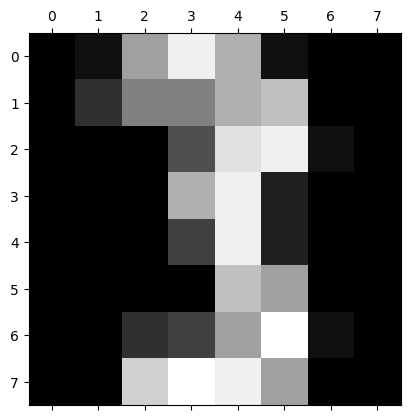

In [16]:
plt.gray() 
plt.matshow(digit_data.images[59]) 
plt.show()

We're interested in the data and target fields

In [17]:
X3 = pd.DataFrame(digit_data.data, columns=digit_data.feature_names)
y3 = pd.Series(digit_data.target)

In [18]:
y3

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Length: 1797, dtype: int32

In [19]:
X3

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


Split:\
(We actually also need a validation data set, more on this if and when you take a ML course)

In [20]:
X3_train, X3_test, y3_train, y3_test = sk.model_selection.train_test_split(X3, y3, test_size=0.3, random_state=1) 

Each digit is written as 8x8 pixels. So we have 64 features for each digit

In [21]:
X3.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [22]:
y3_train.head()

547     9
314     6
786     0
1066    9
426     8
dtype: int32

Define a function that builds a model according to a given tree depth, and returns it's accuracy

In [23]:
def get_acc(max_depth456, train_X3, test_X3, train_y3, test_y3):
    model = sk.tree.DecisionTreeClassifier(criterion="gini", max_depth=max_depth456, random_state=0)
    model.fit(train_X3, train_y3)
    preds_val = model.predict(test_X3)
    acc = sk.metrics.accuracy_score(preds_val, test_y3)
    return(acc)

Use the function of max depth:

In [24]:
for max_d in range(1,26):
    my_acc = get_acc(max_d, X3_train, X3_test, y3_train, y3_test)
    print(max_d, my_acc)

1 0.1925925925925926
2 0.3148148148148148
3 0.45925925925925926
4 0.575925925925926
5 0.6888888888888889
6 0.7814814814814814
7 0.8333333333333334
8 0.8518518518518519
9 0.8574074074074074
10 0.8555555555555555
11 0.8555555555555555
12 0.8574074074074074
13 0.8611111111111112
14 0.8611111111111112
15 0.8592592592592593
16 0.8592592592592593
17 0.8592592592592593
18 0.8592592592592593
19 0.8592592592592593
20 0.8592592592592593
21 0.8592592592592593
22 0.8592592592592593
23 0.8592592592592593
24 0.8592592592592593


<a id='section4.1'></a>
## 4.1 Overfitting - use random forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=8, random_state=0, criterion="gini")
rf.fit(X_train, y_train)
predrf = rf.predict(X_test)
acc = sk.metrics.accuracy_score(predrf, y_test)
acc

0.9555555555555556